# Constructing the astronomy data set

This notebook constructs the chemical abundances data set for the application of the constrained denoisings methods to the astronomy. The data are taken from the APOGEE data set.

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [6]:
np.random.seed(10027)
nsub = 1500

X = np.load('X_chem.pkl', allow_pickle=True) 
prec = np.load('chem_prec.pkl', allow_pickle=True) 
abunds = ['MG_FE', 'FE_H', 'C_FE', 'CI_FE', 'N_FE', 'O_FE', 
          'AL_FE', 'CA_FE', 'TI_FE', 'SI_FE', 'P_FE', 'S_FE', 
          'K_FE', 'TIII_FE', 'V_FE', 'CR_FE', 'MN_FE', 'CO_FE', 'NI_FE']
n, d = X.shape
inds = [i for i in range(d) if abunds[i] in ['O_FE','N_FE']]
X = X[:, inds]
prec = prec[:, inds]
rand_ind = np.random.choice(range(X.shape[0]), nsub)


chemicals_dict = {'O_FE_val': X[rand_ind,0], 'N_FE_val':X[rand_ind,1],
                  'O_FE_prec':prec[rand_ind,0], 'N_FE_prec':prec[rand_ind,1]}
chemicals = pd.DataFrame.from_dict(data=chemicals_dict)
chemicals

,O_FE_val,N_FE_val,O_FE_prec,N_FE_prec
0,0.451253,0.000488,1242.647583,3506.642822
1,0.205446,-0.019748,527.858582,1454.366577
2,0.286582,-0.012526,544.095215,1317.257568
3,0.170408,0.100237,158.037277,366.887726
4,0.220619,0.210335,316.018341,732.457886
...,...,...,...,...
1495,0.424075,-0.068805,703.502441,1953.476562
1496,0.225244,0.231816,432.391632,971.942261
1497,0.184397,0.042081,404.006744,1105.418091
1498,0.261229,0.090537,504.675446,1389.055908


As a sanity check, let's visualize the data with a scatterplot.

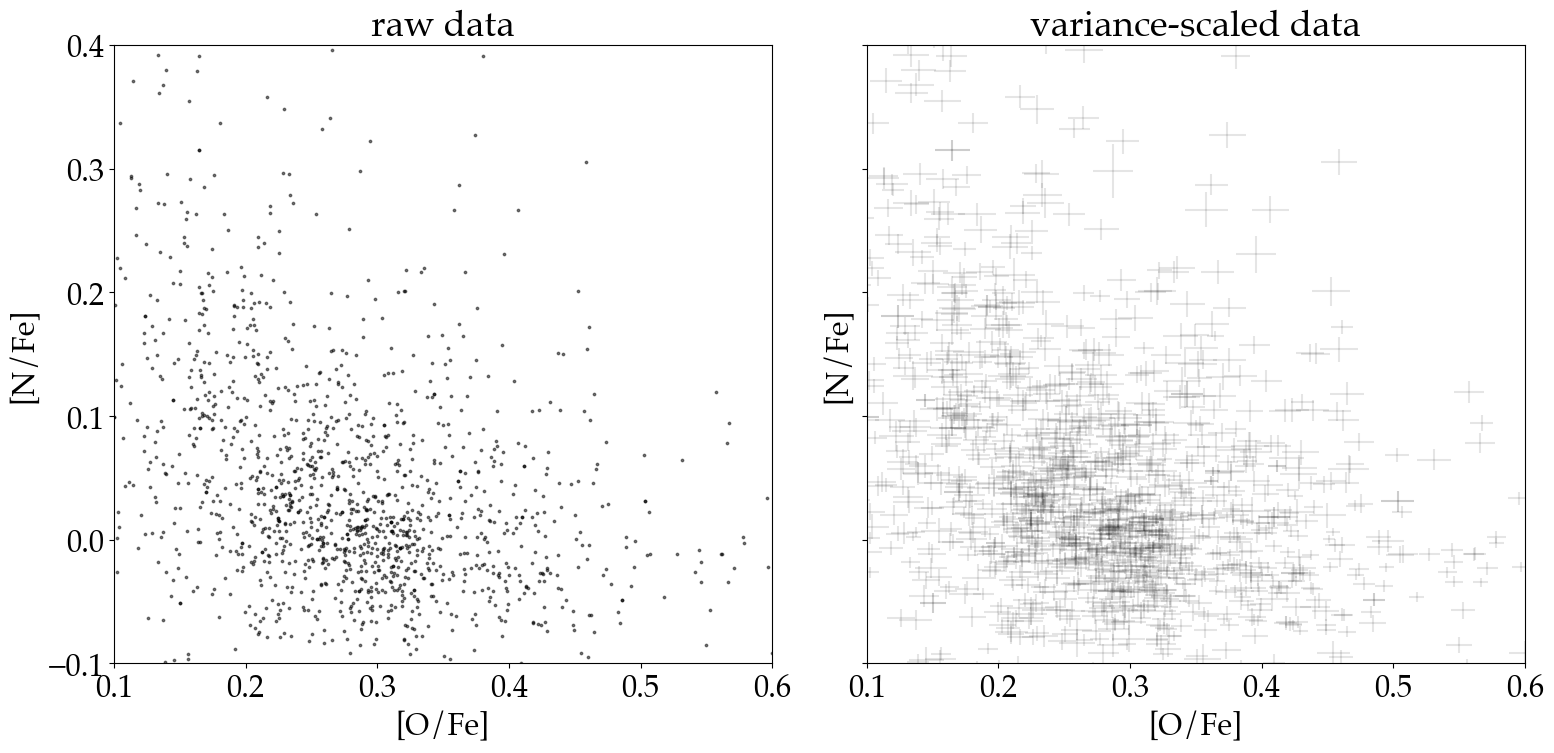

In [26]:
plt.rcParams.update({'font.size': 22,
                    'mathtext.fontset': 'stix',
                    'font.family': 'serif',
                    'font.serif':'Palatino'})

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16,8))

ax[0].set_title('raw data')
ax[0].set_ylabel('[N/Fe]')
ax[0].set_xlabel('[O/Fe]')
ax[0].scatter(chemicals['O_FE_val'],chemicals['N_FE_val'], alpha=0.5, s=3, color='black')

ax[1].set_title('variance-scaled data')
ax[1].set_ylabel('[N/Fe]')
ax[1].set_xlabel('[O/Fe]')
ax[1].scatter(chemicals['O_FE_val'],chemicals['N_FE_val'], alpha=0.1, marker='|',
              s=1e5/chemicals['N_FE_prec'], color='black')
ax[1].scatter(chemicals['O_FE_val'],chemicals['N_FE_val'], alpha=0.1, marker='_',
              s=1e5/chemicals['O_FE_prec'], color='black')


xmin, xmax = 0.1, 0.6,
ymin, ymax = -0.1, 0.4
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
#plt.savefig('fig_1_2.pdf')
plt.tight_layout()

Now save the data to an external pickle file.

In [27]:
chemicals.to_pickle("./astronomy_data.pkl")  